In [7]:
import torch
from glide_text2im.unet import UNetModel

In [8]:
unet = UNetModel(in_channels=3,
                 model_channels=64,
                 out_channels=3,
                 num_res_blocks=2,
                 attention_resolutions=())
                 

In [9]:
model = unet
param_size = 0
for param in model.parameters():
    param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))

model size: 215.815MB


In [10]:
from glide_text2im.gaussian_diffusion import get_named_beta_schedule, GaussianDiffusion

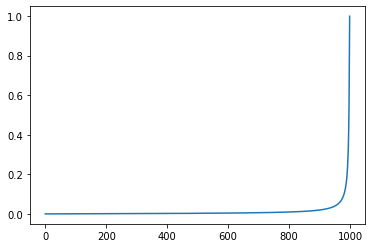

In [11]:
import matplotlib.pyplot as plt

betas = get_named_beta_schedule("squaredcos_cap_v2", 1000)
plt.plot(betas)
plt.show()

In [12]:
diffusion = GaussianDiffusion(betas=betas)

In [13]:
import torch
x = torch.randn(2, 3, 256, 256)
diffusion.forward(unet, x)

tensor(0.7972, grad_fn=<L1LossBackward0>)